# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** T. Zalfa Ramadhani
- **Email:** m006d4kx2075@bangkit.academy
- **ID Dicoding:** zalfa_r

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan hari libur pada tahun 2011?
- Bagaimana pengaruh cuaca terhadap frekuensi penyewa pada bike sharing?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi dan analisis data
import numpy as np  # Mengimpor library numpy untuk operasi matematika dan array
import seaborn as sns  # Mengimpor library seaborn untuk visualisasi data yang menarik dan informatif
import streamlit as st  # Mengimpor library streamlit untuk membangun aplikasi web interaktif dengan mudah
import matplotlib.pyplot as plt  # Mengimpor library matplotlib untuk visualisasi data dalam bentuk grafik dan plot

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")  # Membaca file CSV "day.csv" dan menyimpannya ke dalam DataFrame pandas yang disebut "day_df"
day_df.head() # Menampilkan lima baris pertama dari DataFrame "day_df" untuk memberikan gambaran singkat tentang struktur dan isi data


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv") # Membaca file CSV "hour.csv" dan menyimpannya ke dalam DataFrame pandas yang disebut "hour_df"
hour_df.head() # Menampilkan lima baris pertama dari DataFrame "hour_df" untuk memberikan gambaran singkat tentang struktur dan isi data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# merged_df = pd.merge(left=hour_df, right=day_df, how="left", left_on='dteday', right_on='dteday')

# print(merged_df.columns)

### Assessing Data

**Data Info**

In [5]:
day_df.info()  # Menggunakan metode "info()" pada DataFrame "day_df" untuk memberikan informasi tentang struktur dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Check Missing Value**

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan adanya missing value

**Check Dupllicate**

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ditemukan duplicate

**Deskripsi Data**

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Data Info**

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Check Missing Value**

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan adanya missing value

**Check Dupllicate**

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ditemukan duplicate

**Deskripsi Data**

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [13]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"]) # Mengubah tipe data kolom "dteday" dari string ke datetime
print(day_df["dteday"].dtypes)


datetime64[ns]


In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
print(hour_df["dteday"].dtypes)

datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
hour_df.describe()  

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [17]:
hour_df.groupby(by="holiday").cnt.count()

holiday
0    16879
1      500
Name: cnt, dtype: int64

In [18]:
hour_df.groupby(by="season").cnt.count()

season
1    4242
2    4409
3    4496
4    4232
Name: cnt, dtype: int64

### Melihat Persebaran penyewa berdasarkan Jam

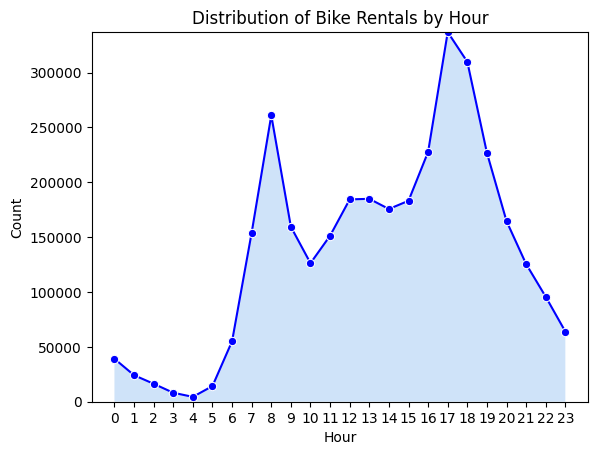

2024-03-04 11:04:24.269 
  command:

    streamlit run C:\Users\zalfa\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]


Jumlah penyewaan sepeda berdasarkan jam:
hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


<Figure size 640x480 with 0 Axes>

In [19]:
# Menghitung jumlah penyewaan sepeda berdasarkan jam
hourly_cnt = hour_df.groupby('hr')['cnt'].sum()

# Untuk mengatur palet warna
sns.set_palette("pastel")

# Plot persebaran jumlah penyewaan berdasarkan jam menggunakan seaborn
sns.lineplot(x=hourly_cnt.index, y=hourly_cnt.values, marker='o', color='blue', linewidth=1.5)  # Garis untuk kontur
plt.fill_between(hourly_cnt.index, hourly_cnt.values, alpha=0.5)  # Area di bawah garis

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of Bike Rentals by Hour')
plt.xticks(range(24))  # Label sumbu x dari 0 hingga 23
plt.ylim(0, hourly_cnt.max() + 5)
plt.show()
st.pyplot(plt)

# Menampilkan jumlah penyewaan sepeda berdasarkan jam
print("Jumlah penyewaan sepeda berdasarkan jam:")
print(hourly_cnt)

### Melihat Frekuensi penyewa berdasarkan bulan

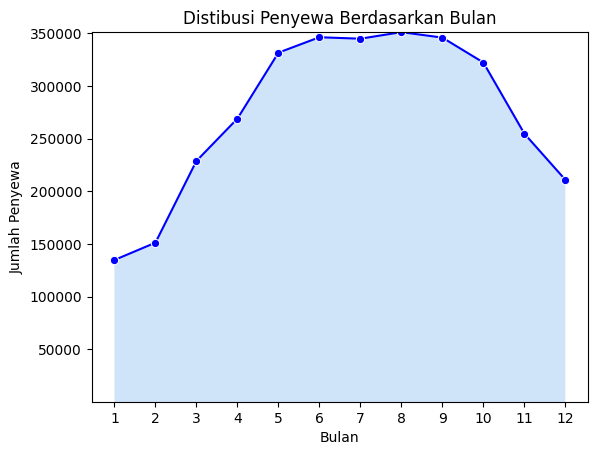

Jumlah penyewa berdasarkan bulan:
mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


In [20]:
# Menghitung jumlah total penyewa setiap bulan
month_cnt = day_df.groupby('mnth')['cnt'].sum()

# Plot grafik garis
sns.lineplot(x=month_cnt.index, y=month_cnt.values, marker='o', color='blue', linewidth=1.5)
plt.fill_between(month_cnt.index, month_cnt.values, alpha=0.5)

plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.title('Distibusi Penyewa Berdasarkan Bulan')
plt.xticks(range(1, 13))  # Setel tanda sumbu x untuk menampilkan bulan dari 1 hingga 12
plt.ylim(400, month_cnt.max() + 5)
plt.show()
st.pyplot(plt)

# Menampilkan jumlah penyewa berdasarkan bulan
print("Jumlah penyewa berdasarkan bulan:")
print(month_cnt)

### Melihat Frekuensi penyewa berdasarkan Tahun

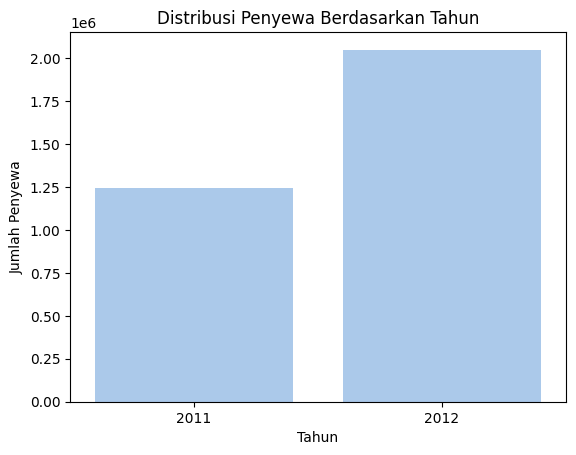

DeltaGenerator()

In [21]:
# Mengelompokkan data berdasarkan tahun dan menghitung jumlah penyewaan sepeda
yearly_cnt = hour_df.groupby('yr')['cnt'].sum().reset_index()

# Plot persebaran penyewa berdasarkan tahun
sns.set_palette("pastel")
sns.barplot(x='yr', y='cnt', data=yearly_cnt)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewa')
plt.title('Distribusi Penyewa Berdasarkan Tahun')
plt.xticks(ticks=[0, 1], labels=['2011', '2012'],)  # Mengatur label sumbu x
plt.show()
st.pyplot(plt)

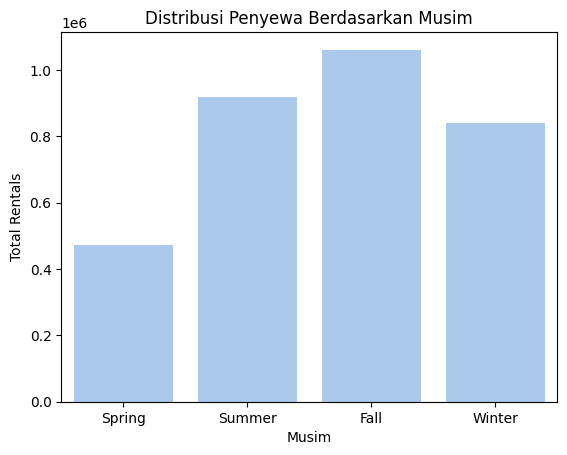

Jumlah penyewa berdasarkan tahun:
   yr      cnt
0   0  1243103
1   1  2049576


In [22]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penyewaan sepeda
season_cnt = hour_df.groupby('season')['cnt'].sum().reset_index()

# Plot persebaran penyewa berdasarkan musim
sns.barplot(x='season', y='cnt', data=season_cnt)
plt.xlabel('Musim')
plt.ylabel('Total Rentals')
plt.title('Distribusi Penyewa Berdasarkan Musim')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])  # Mengatur label sumbu x
plt.show()
st.pyplot(plt)

# Menampilkan jumlah penyewa berdasarkan tahun
print("Jumlah penyewa berdasarkan tahun:")
print(yearly_cnt)

### Hubungan antara Jumlah Penyewa dan Temperatur

<Figure size 640x480 with 0 Axes>

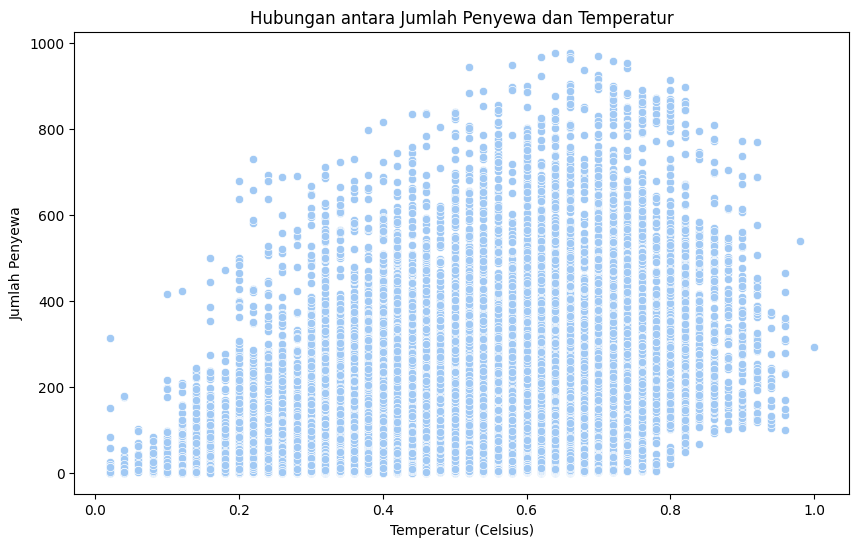

Jumlah penyewa berdasarkan suhu:
temp
0.02       712
0.04       570
0.06       672
0.08       480
0.10      2514
0.12      4440
0.14      7605
0.16     15083
0.18      9318
0.20     28230
0.22     29434
0.24     41843
0.26     49170
0.28     32132
0.30     74303
0.32     82015
0.34     87274
0.36     99202
0.38     61087
0.40    102809
0.42     96087
0.44     80566
0.46     91065
0.48     54845
0.50    105366
0.52    112850
0.54    113962
0.56    123756
0.58     67730
0.60    149905
0.62    148185
0.64    154985
0.66    156204
0.68     73129
0.70    177298
0.72    163449
0.74    161587
0.76    135660
0.78     52930
0.80    112897
0.82     72354
0.84     44963
0.86     42307
0.88     19274
0.90     27836
0.92     15681
0.94      3690
0.96      4392
0.98       539
1.00       294
Name: cnt, dtype: int64


In [23]:
# Plot distribusi jumlah penyewa berdasarkan suhu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df)
plt.xlabel('Temperatur (Celsius)')
plt.ylabel('Jumlah Penyewa')
plt.title('Hubungan antara Jumlah Penyewa dan Temperatur')
plt.show()
st.pyplot(plt)

# Menampilkan hasil jumlah penyewa berdasarkan suhu
print("Jumlah penyewa berdasarkan suhu:")
print(hour_df.groupby('temp')['cnt'].sum())

### Distribusi Jumlah Rata-rata Penyewa pada Setiap Musim dan Bulan

<Figure size 640x480 with 0 Axes>

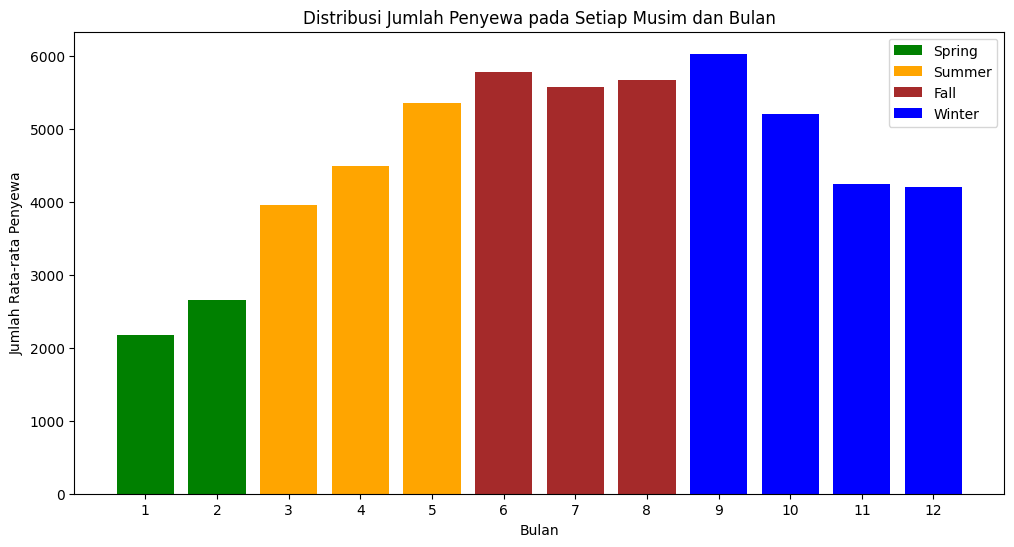

Rata-rata jumlah penyewa berdasarkan musim dan bulan:
Musim Semi (Spring):
mnth
1     2176.338710
2     2655.298246
3     3551.625000
12    1954.454545
Name: cnt, dtype: float64

Musim Panas (Summer):
mnth
3    3947.954545
4    4484.900000
5    5349.774194
6    5773.850000
Name: cnt, dtype: float64

Musim Gugur (Fall):
mnth
6    5769.400000
7    5563.677419
8    5664.419355
9    5672.704545
Name: cnt, dtype: float64

Musim Dingin (Winter):
mnth
9     6024.500000
10    5199.225806
11    4247.183333
12    4200.950000
Name: cnt, dtype: float64


In [24]:
# Pisahkan data berdasarkan musim
spring = day_df[day_df['season'] == 1]
summer = day_df[day_df['season'] == 2]
fall = day_df[day_df['season'] == 3]
winter = day_df[day_df['season'] == 4]

# Hitung jumlah penyewaan sepeda harian untuk setiap musim dan bulan
spring_rentals = spring.groupby('mnth')['cnt'].mean()
summer_rentals = summer.groupby('mnth')['cnt'].mean()
fall_rentals = fall.groupby('mnth')['cnt'].mean()
winter_rentals = winter.groupby('mnth')['cnt'].mean()

# Plot persebaran musim pada bulan menggunakan bar plot
plt.figure(figsize=(12, 6))
plt.bar(spring_rentals.index, spring_rentals.values, color='green', label='Spring')
plt.bar(summer_rentals.index, summer_rentals.values, color='orange', label='Summer')
plt.bar(fall_rentals.index, fall_rentals.values, color='brown', label='Fall')
plt.bar(winter_rentals.index, winter_rentals.values, color='blue', label='Winter')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rata-rata Penyewa')
plt.title('Distribusi Jumlah Penyewa pada Setiap Musim dan Bulan')
plt.legend()
plt.xticks(range(1, 13))
plt.show()
st.pyplot(plt)

# Menampilkan rata-rata jumlah penyewa berdasarkan musim dan bulan
print("Rata-rata jumlah penyewa berdasarkan musim dan bulan:")
print("Musim Semi (Spring):")
print(spring_rentals)
print("\nMusim Panas (Summer):")
print(summer_rentals)
print("\nMusim Gugur (Fall):")
print(fall_rentals)
print("\nMusim Dingin (Winter):")
print(winter_rentals)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan hari libur pada tahun 2011?

<Figure size 640x480 with 0 Axes>

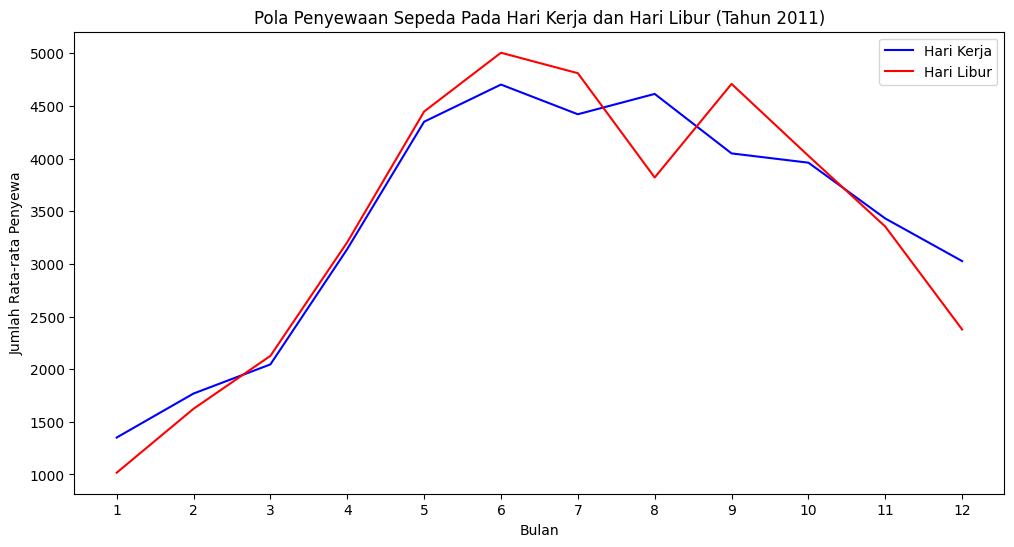

Bulan 1:
  Hari Kerja: 1350.45
  Hari Libur: 1016.3636363636364
Bulan 2:
  Hari Kerja: 1768.4736842105262
  Hari Libur: 1623.7777777777778
Bulan 3:
  Hari Kerja: 2045.0869565217392
  Hari Libur: 2126.0
Bulan 4:
  Hari Kerja: 3140.75
  Hari Libur: 3205.5
Bulan 5:
  Hari Kerja: 4350.0952380952385
  Hari Libur: 4446.9
Bulan 6:
  Hari Kerja: 4703.090909090909
  Hari Libur: 5005.5
Bulan 7:
  Hari Kerja: 4421.0
  Hari Libur: 4811.0
Bulan 8:
  Hari Kerja: 4614.304347826087
  Hari Libur: 3820.25
Bulan 9:
  Hari Kerja: 4049.2380952380954
  Hari Libur: 4709.333333333333
Bulan 10:
  Hari Kerja: 3961.1
  Hari Libur: 4026.2727272727275
Bulan 11:
  Hari Kerja: 3431.15
  Hari Libur: 3354.4
Bulan 12:
  Hari Kerja: 3026.3809523809523
  Hari Libur: 2376.9


In [25]:
# Filter data untuk tahun 2011
day_df_2011 = day_df[day_df['yr'] == 0]

# Pisahkan data berdasarkan hari kerja dan hari libur untuk tahun 2011
working_days_2011 = day_df_2011[day_df_2011['workingday'] == 1]
non_working_days_2011 = day_df_2011[day_df_2011['workingday'] == 0]

# Hitung jumlah penyewaan sepeda harian untuk setiap bulan
rentals_working_days_2011 = working_days_2011.groupby('mnth')['cnt'].mean()
rentals_non_working_days_2011 = non_working_days_2011.groupby('mnth')['cnt'].mean()

# Plot pola penggunaan sepeda antara hari kerja dan hari libur setiap bulannya pada tahun 2011
plt.figure(figsize=(12, 6))
plt.plot(rentals_working_days_2011.index, rentals_working_days_2011.values, label='Hari Kerja', color='blue')
plt.plot(rentals_non_working_days_2011.index, rentals_non_working_days_2011.values, label='Hari Libur', color='red')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rata-rata Penyewa')
plt.title('Pola Penyewaan Sepeda Pada Hari Kerja dan Hari Libur (Tahun 2011)')
plt.legend()
plt.xticks(range(1, 13))
plt.show()
st.pyplot(plt)

# Mencetak nilai rata-rata total penyewaan sepeda untuk setiap bulan
for month in range(1, 13):
    print(f"Bulan {month}:")
    print(f"  Hari Kerja: {rentals_working_days_2011[month]}")
    print(f"  Hari Libur: {rentals_non_working_days_2011[month]}")


### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap frekuensi penyewa pada bike sharing?

<Figure size 640x480 with 0 Axes>

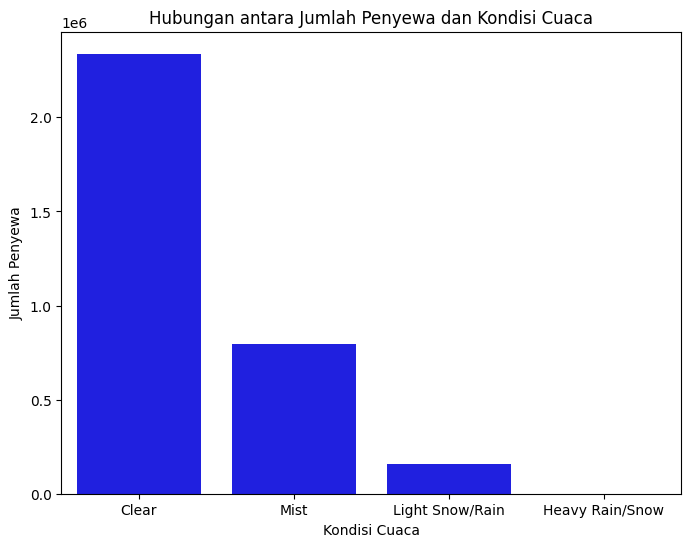

Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca:
Kondisi Cuaca 1: 2338173 penyewaan
Kondisi Cuaca 2: 795952 penyewaan
Kondisi Cuaca 3: 158331 penyewaan
Kondisi Cuaca 4: 223 penyewaan


In [26]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung jumlah penyewaan sepeda
weather_counts = hour_df.groupby('weathersit')['cnt'].sum().reset_index()

# Plot persebaran penyewa berdasarkan kondisi cuaca
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_counts, color='blue')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa')
plt.title('Hubungan antara Jumlah Penyewa dan Kondisi Cuaca')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()
st.pyplot(plt)

# Cetak hasil jumlah penyewaan sepeda berdasarkan kondisi cuaca
print("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca:")
for index, row in weather_counts.iterrows():
    print(f"Kondisi Cuaca {row['weathersit']}: {row['cnt']} penyewaan")


## Conclusion

- **Conclution pertanyaan 1 :** Pola penggunaan sepeda pada hari kerja dan hari libur dapat berbeda-beda setiap bulannya, terdapat peningkatan yang signifikan selama bulan Maret menuju Mei, dan penurunan yang signifikan selama bulan Agustus hingga September. Pola ini kemungkinan juga dipengaruhi oleh faktor-faktor seperti cuaca, libur nasional, atau peristiwa khusus yang terjadi selama bulan tersebut.
- **Conclution pertanyaan 2 :** Jumlah penyewa saat tinggi pada tipe cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy), diikuti oleh tipe cuaca 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist). Lalu jumlah penyewa turun pada tipe 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), dan turun drastis pada cuaca tipe 4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog), dengan hanya 223 penyewaan.